In [1]:
from os.path import expanduser, join
import numpy as np
import matplotlib.pyplot as plt

from black_box_tools.db_utils import DBUtils
from black_box_tools.data_utils import DataUtils, Filters
from black_box_tools.plot_utils import PlotUtils

# Parameters

The following parameters should be set appropriately so that the correct data are read.

In [2]:
log_db_data_name = 'black_box_data'
number_of_smart_wheels = 4

# Database restoring

Uncomment the line below for restoring the MongoDB database.

In [3]:
DBUtils.restore_db('data', db_name=log_db_data_name)

True

# Data parsing

## Smart wheel data

In [4]:
sw_data_docs = DBUtils.get_all_docs(log_db_data_name, 'ros_sw_ethercat_parser_data')
sw_timestamps = DataUtils.get_all_measurements(sw_data_docs, 'timestamp')

# we extract all current measurements
wheel1_currents = DataUtils.get_all_measurements(sw_data_docs,
                                                 'sensors/*/current_1_q',
                                                 number_of_smart_wheels,
                                                 data_filter=Filters.MEDIAN,
                                                 filter_window_size=5)
wheel2_currents = DataUtils.get_all_measurements(sw_data_docs,
                                                 'sensors/*/current_2_q',
                                                 number_of_smart_wheels,
                                                 data_filter=Filters.MEDIAN,
                                                 filter_window_size=5)

# we extract all voltage measurements
wheel1_voltages = DataUtils.get_all_measurements(sw_data_docs,
                                                 'sensors/*/voltage_1',
                                                 number_of_smart_wheels,
                                                 data_filter=Filters.MEDIAN,
                                                 filter_window_size=5)
wheel2_voltages = DataUtils.get_all_measurements(sw_data_docs,
                                                 'sensors/*/voltage_2',
                                                 number_of_smart_wheels,
                                                 data_filter=Filters.MEDIAN,
                                                 filter_window_size=5)

# we extract all velocity measurements
wheel1_velocities = DataUtils.get_all_measurements(sw_data_docs,
                                                   'sensors/*/velocity_1',
                                                   number_of_smart_wheels,
                                                   data_filter=Filters.MEDIAN,
                                                   filter_window_size=5)
wheel2_velocities = DataUtils.get_all_measurements(sw_data_docs,
                                                   'sensors/*/velocity_2',
                                                   number_of_smart_wheels,
                                                   data_filter=Filters.MEDIAN,
                                                   filter_window_size=5)
pivot_velocities = DataUtils.get_all_measurements(sw_data_docs,
                                                  'sensors/*/velocity_pivot',
                                                  number_of_smart_wheels,
                                                  data_filter=Filters.MEDIAN,
                                                  filter_window_size=5)

# we extract all acceleration measurements from the wheel IMUs
x_accelerations = DataUtils.get_all_measurements(sw_data_docs,
                                                 'sensors/*/accel_x',
                                                 number_of_smart_wheels,
                                                 data_filter=Filters.MEDIAN,
                                                 filter_window_size=5)
y_accelerations = DataUtils.get_all_measurements(sw_data_docs,
                                                 'sensors/*/accel_y',
                                                 number_of_smart_wheels,
                                                 data_filter=Filters.MEDIAN,
                                                 filter_window_size=5)
z_accelerations = DataUtils.get_all_measurements(sw_data_docs,
                                                 'sensors/*/accel_z',
                                                 number_of_smart_wheels,
                                                 data_filter=Filters.MEDIAN,
                                                 filter_window_size=5)

# we extract all gyro measurements from the wheel IMUs
x_gyros = DataUtils.get_all_measurements(sw_data_docs,
                                         'sensors/*/gyro_x',
                                         number_of_smart_wheels,
                                         data_filter=Filters.MEDIAN,
                                         filter_window_size=5)
y_gyros = DataUtils.get_all_measurements(sw_data_docs,
                                         'sensors/*/gyro_y',
                                         number_of_smart_wheels,
                                         data_filter=Filters.MEDIAN,
                                         filter_window_size=5)
z_gyros = DataUtils.get_all_measurements(sw_data_docs,
                                         'sensors/*/gyro_z',
                                         number_of_smart_wheels,
                                         data_filter=Filters.MEDIAN,
                                         filter_window_size=5)

## Velocity commands

In [5]:
cmd_vel_docs = DBUtils.get_all_docs(log_db_data_name, 'ros_ropod_cmd_vel')

vel_timestamps = DataUtils.get_all_measurements(cmd_vel_docs, 'timestamp')
x_velocities = DataUtils.get_all_measurements(cmd_vel_docs, 'linear/x')
y_velocities = DataUtils.get_all_measurements(cmd_vel_docs, 'linear/y')
theta_velocities = DataUtils.get_all_measurements(cmd_vel_docs, 'angular/z')

## Events

In [6]:
event_docs = DBUtils.get_all_docs(log_db_data_name, 'ros_ropod_event')
event_timestamps = DataUtils.get_all_measurements(event_docs, 'timestamp')

# Data plotting

## Velocity commands

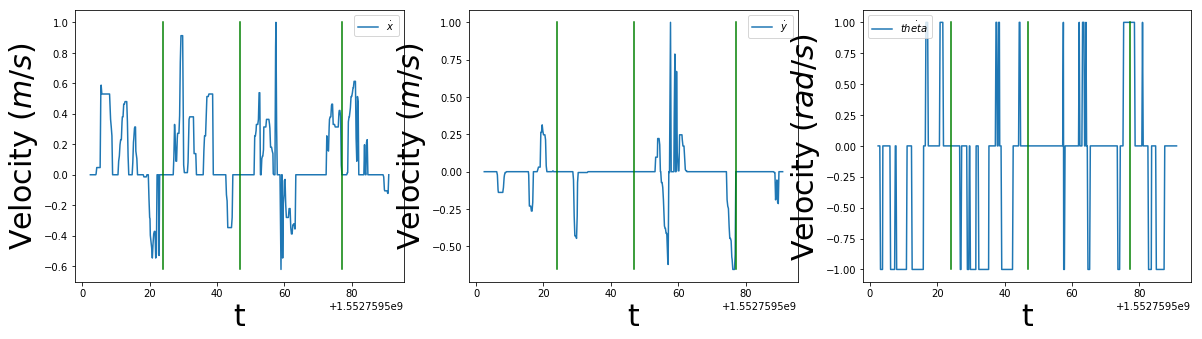

In [7]:
fig = plt.figure(figsize=(20,5))

PlotUtils.subplot_data(fig=fig, subplot_params=(1,3,1),
                       timestamps=vel_timestamps,
                       data=x_velocities,
                       x_label='t',
                       y_label='Velocity ($m/s$)',
                       data_label='$\dot{x}$',
                       event_timestamps=event_timestamps)

PlotUtils.subplot_data(fig=fig, subplot_params=(1,3,2),
                       timestamps=vel_timestamps,
                       data=y_velocities,
                       x_label='t',
                       y_label='Velocity ($m/s$)',
                       data_label='$\dot{y}$',
                       event_timestamps=event_timestamps)

PlotUtils.subplot_data(fig=fig, subplot_params=(1,3,3),
                       timestamps=vel_timestamps,
                       data=theta_velocities,
                       x_label='t',
                       y_label='Velocity ($rad/s$)',
                       data_label='$\dot{theta}$',
                       event_timestamps=event_timestamps)

plt.show()

## Wheel currents

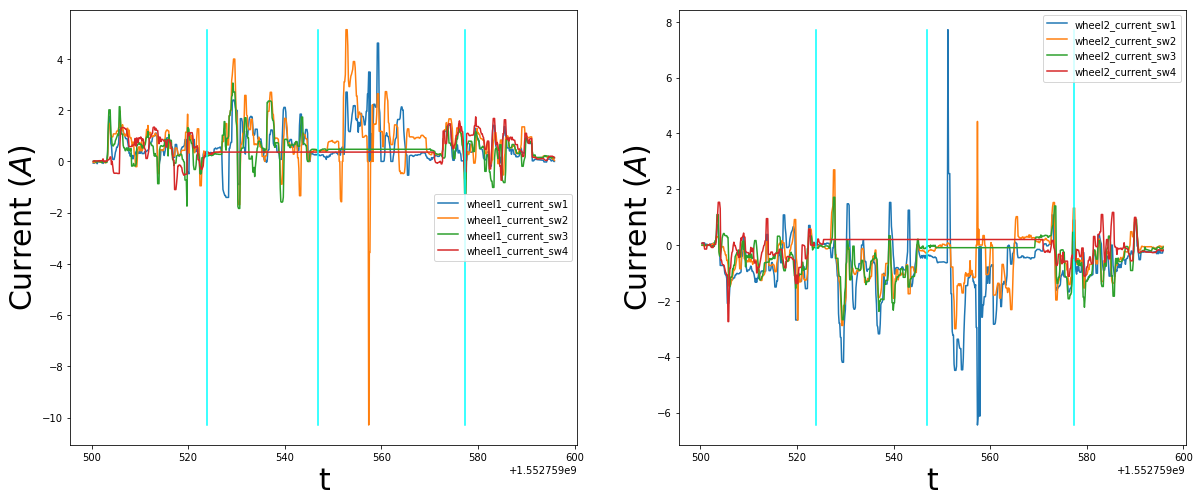

In [8]:
fig = plt.figure(figsize=(20, 8))

data_labels = ['wheel1_current_sw{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,2,1),
                             timestamps=sw_timestamps,
                             data=wheel1_currents,
                             x_label='t', y_label='Current ($A$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

data_labels = ['wheel2_current_sw{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,2,2),
                             timestamps=sw_timestamps,
                             data=wheel2_currents,
                             x_label='t', y_label='Current ($A$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

plt.show()

## Wheel voltages

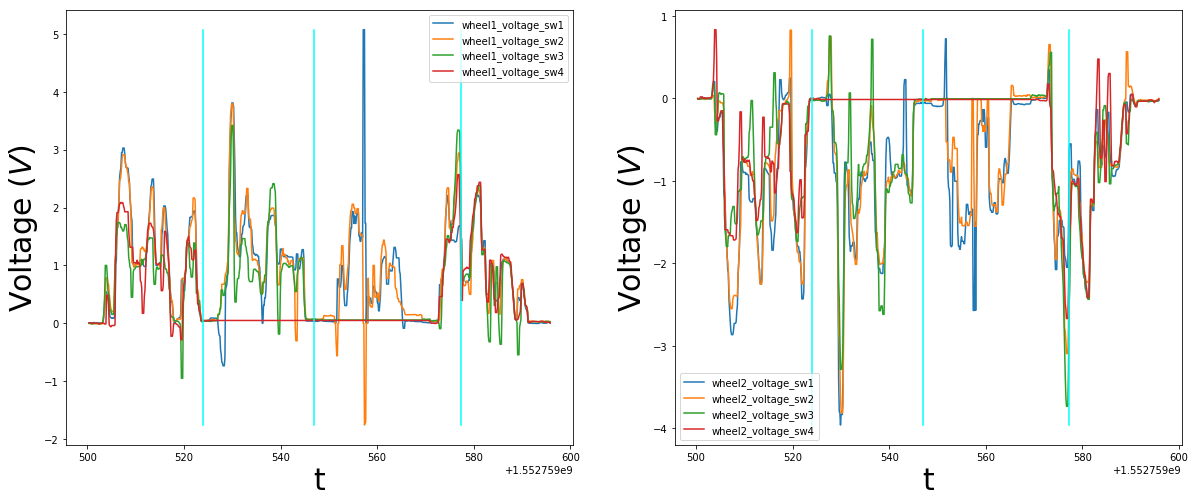

In [9]:
fig = plt.figure(figsize=(20, 8))

data_labels = ['wheel1_voltage_sw{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,2,1),
                             timestamps=sw_timestamps,
                             data=wheel1_voltages,
                             x_label='t', y_label='Voltage ($V$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

data_labels = ['wheel2_voltage_sw{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,2,2),
                             timestamps=sw_timestamps,
                             data=wheel2_voltages,
                             x_label='t', y_label='Voltage ($V$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

plt.show()

## Wheel velocities

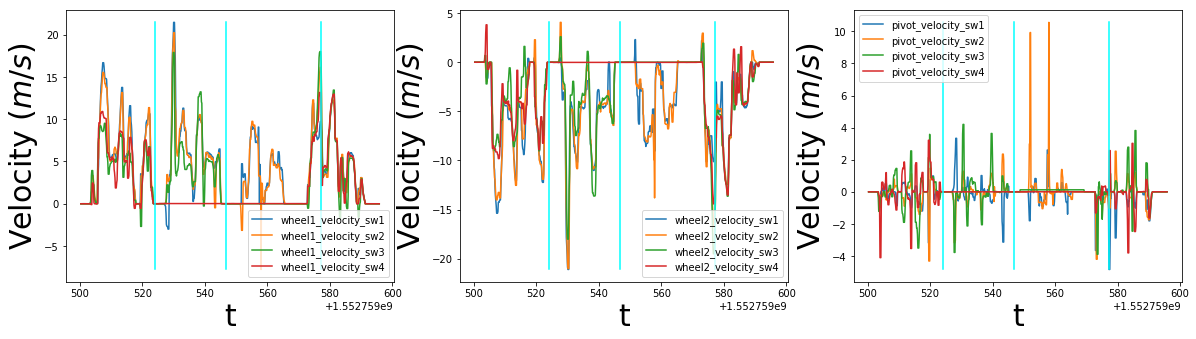

In [10]:
fig = plt.figure(figsize=(20,5))

data_labels = ['wheel1_velocity_sw{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,3,1),
                             timestamps=sw_timestamps,
                             data=wheel1_velocities,
                             x_label='t', y_label='Velocity ($m/s$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

data_labels = ['wheel2_velocity_sw{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,3,2),
                             timestamps=sw_timestamps,
                             data=wheel2_velocities,
                             x_label='t', y_label='Velocity ($m/s$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

data_labels = ['pivot_velocity_sw{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,3,3),
                             timestamps=sw_timestamps,
                             data=pivot_velocities,
                             x_label='t', y_label='Velocity ($m/s$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

plt.show()

## IMU acceleration measurements

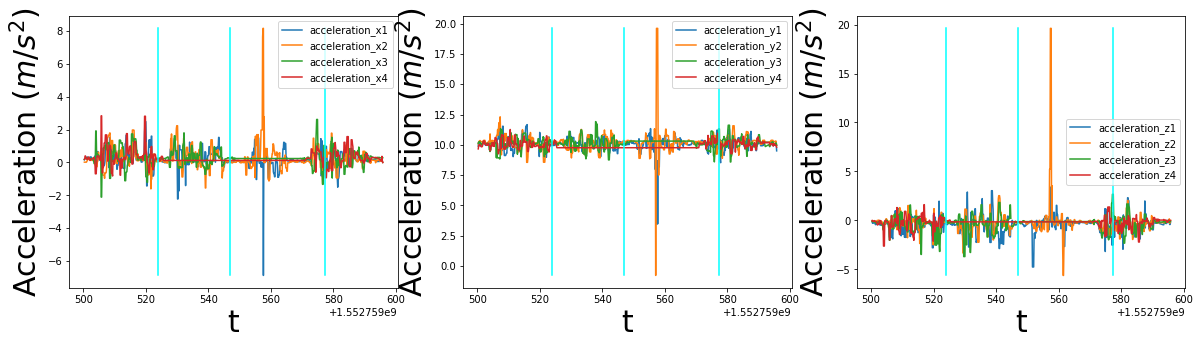

In [11]:
fig = plt.figure(figsize=(20,5))

data_labels = ['acceleration_x{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,3,1),
                             timestamps=sw_timestamps,
                             data=x_accelerations,
                             x_label='t', y_label='Acceleration ($m/s^2$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

data_labels = ['acceleration_y{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,3,2),
                             timestamps=sw_timestamps,
                             data=y_accelerations,
                             x_label='t', y_label='Acceleration ($m/s^2$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

data_labels = ['acceleration_z{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,3,3),
                             timestamps=sw_timestamps,
                             data=z_accelerations,
                             x_label='t', y_label='Acceleration ($m/s^2$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

plt.show()

## IMU gyro measurements

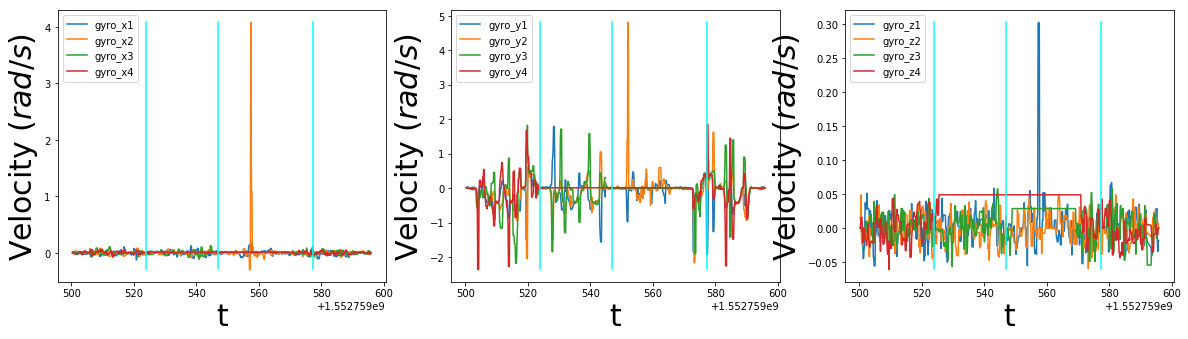

In [12]:
fig = plt.figure(figsize=(20,5))

data_labels = ['gyro_x{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,3,1),
                             timestamps=sw_timestamps,
                             data=x_gyros,
                             x_label='t', y_label='Velocity ($rad/s$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

data_labels = ['gyro_y{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,3,2),
                             timestamps=sw_timestamps,
                             data=y_gyros,
                             x_label='t', y_label='Velocity ($rad/s$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

data_labels = ['gyro_z{0}'.format(i+1) for i in range(number_of_smart_wheels)]
PlotUtils.subplot_data_lists(fig=fig, subplot_params=(1,3,3),
                             timestamps=sw_timestamps,
                             data=z_gyros,
                             x_label='t', y_label='Velocity ($rad/s$)',
                             data_labels=data_labels,
                             event_timestamps=event_timestamps,
                             event_annotation_color='cyan')

plt.show()